In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain
import networkx as nx

In [2]:
consumer_key = 'LrRwrJkM7nnBI6BSbIEbWJxrI'
consumer_secret = 'bQmTTaTjBXoppxK273tWDVGhBCvJPrGlODuRxXp7QPOyyEmL6f'
access_token = '2249180905-d6O8GZoWdV8VVvIBlARL9p4blRPNkQkgVtyGGGe'
access_token_secret = 'Nixtn8xYDwq0vq67ivAc7NumXmltvv71aGKabeKa60Ct7'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [4]:
seed_user = api.get_user(screen_name = 'VictoriaBBCAN9')
seed_user.id

1364325620289859595

In [5]:
user_list = [seed_user.id]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

1839


In [6]:
print(follower_list[0])

[120970881, 1236488668690382849, 4558556608, 187795703, 282749479, 292096600, 1357446997087838208, 231926291, 1601531742, 3313410487, 860304945576333313, 24631133, 601084442, 32730307, 251918964, 56164795, 1275958689241989129, 265616751, 1164984259116969986, 1241878827376226307, 17360858, 727590698, 376505689, 2384103818, 4865226592, 266973537, 34695699, 28185563, 1294702695194845184, 1317460521063428096, 32995896, 23718434, 1215019256208744448, 57171363, 73731911, 1376777067082051587, 94681865, 114089991, 1376686662223163392, 1361342359192166401, 1376720193968164865, 203559298, 746062957545545728, 819055356898840581, 1154156190823149568, 133003405, 591373338, 262054487, 1376730248394407940, 986994384334766081, 24780032, 3719378414, 23699415, 1564761284, 1203774999431204871, 1328136067543863297, 345084049, 23680816, 632023682, 159291353, 1081027123530260481, 1291691758565425153, 24080340, 539444923, 312193602, 187276675, 1371580948425363456, 38229919, 1083228151822667776, 3291832425, 2

In [7]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = seed_user.id #Set my user ID as the source

In [8]:
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

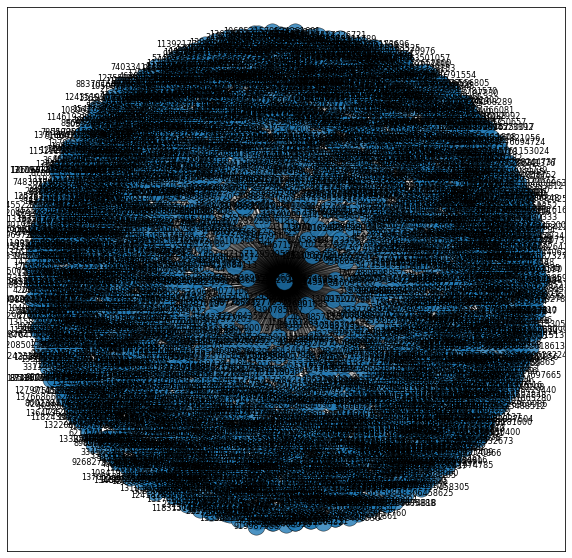

In [9]:
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [ ]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 450 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    # fetching the user
    user = api.get_user(userID)

    # fetching the followers_count
    followers_count = user.followers_count

    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 5000: #Only take first 5000 followers
                break
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

120970881
error
1236488668690382849
9
4558556608
12
187795703
2766
282749479
36
292096600
1
1357446997087838208
68
231926291
101
1601531742
352
3313410487
139
860304945576333313
28
24631133
64
601084442
187
32730307
error
251918964


Rate limit reached. Sleeping for: 871


273
56164795
25
1275958689241989129
265616751
236
1164984259116969986
10
1241878827376226307
4
17360858
660
727590698
40
376505689
5000
2384103818
153
4865226592
error
266973537
1759
34695699
140
28185563
742
1294702695194845184
28
1317460521063428096


Rate limit reached. Sleeping for: 913


32995896
error
23718434
777
1215019256208744448
error
57171363
error
73731911
31
1376777067082051587
94681865
1555
114089991
54
1376686662223163392
1361342359192166401
18
1376720193968164865
7
203559298
146
746062957545545728
31
819055356898840581
81
1154156190823149568


Rate limit reached. Sleeping for: 911


error
133003405
105
591373338
error
262054487
125
1376730248394407940
986994384334766081
596
24780032
5000
3719378414
5
23699415
3504
1564761284
39
1203774999431204871
31
1328136067543863297
373
345084049
766
23680816
338
632023682
36
159291353


Rate limit reached. Sleeping for: 912


330
1081027123530260481
383
1291691758565425153
175
24080340
error
539444923
error
312193602
157
187276675
1043
1371580948425363456
error
38229919
error
1083228151822667776
427
3291832425
24
26006790
5000
1292704598365474818
32
1376353524573892608
8
1259597792718307328
38
787304261281386497


Rate limit reached. Sleeping for: 912


8
1340905759
1787
1182439766693949440
270
321386332
63
3026356925
5
754406046853111808
error
63796431
136
1050074776461565952
3
1368728601374392320
4
1291212644225966080
11
1408463491
217
2592246247
2
1371599136261279744
46924032
250
860238414255452161
error
372549541


Rate limit reached. Sleeping for: 911


240
2554099898
543
2254306980
523
146996204
321
342432135
error
1292022001062748160
1
3335470775
408
1055990570
392
15786871
error
1309392703881457665
6
131043826
18
2358408036
11
2298942464
171
1232551667377115137
error
1646460998
46
130715220


Rate limit reached. Sleeping for: 906


error
25152787
162
891810330598309888
38
3310153283
error
1133204889281150976
43
1368032936872734723
129506482
284
1223182747
41
1141858776871575552
39
984651929463742464
244265585
1207
1040968447419658241
34
1166841677451014144
25
300079750
7
551479092
213
1375921509051609090


Rate limit reached. Sleeping for: 906


3
35491685
458
880653348
120
4758157707
37
986073478229995520
21
1286533350308507653
5
1118917492578111489
11
1104180170829848576
error
950638394
6
76069896
180
781446790541406208
735
1286769102271504384
5
300991672
754
282252797
106
22665645
error
965428025767661573


Rate limit reached. Sleeping for: 904


78
1362041497949003777
4
134948651
551
1371157229156597770
19
73640735
124
1146939199796457473
18
1291255226066853888
3
1374712052506320897
4
3906366332
4
1121339431
6
1916725454
191
909196831
9
20299211
2961
938373014
47
1318765509903527936
870
18708070


Rate limit reached. Sleeping for: 905


323
61800123
437
544671590
error
4140247634
140
24817509
error
809702564
183
42781174
378
1375642840055750657
6
1353133154
199
1375303411567099910
740040073379356672
162
55686546
26
724012646169714688
1141
1095753975234813953
23
2749682613
10
23239761


Rate limit reached. Sleeping for: 905


error
725561155
528
766714475575709696
135
621504983
36
16303813
18
730985027689844737
14
1355263099545276418
201
24613311
error
36722131
error
2157332067
error
188030028
1010
3231250723
341
2432512321
error
3357993177
374
65266426
398
2443192051


Rate limit reached. Sleeping for: 904


342
701981579074097152
error
784107051710644224
436
1375296216179867648
625089889
72
68078283
error
450350769
9
47512058
error
912954150
204
41549894
1392
824231986541842432
31
1283920476058923008
55
2366026817
error
530816675
58
30405398
13
3227308018


Rate limit reached. Sleeping for: 906


14
949338746670985217
error
1305452727380725761
63
1061755408996556805
9
849699351202996224
594
975453249632337920
5
20413405
74
1271692630175485954
16
1370403306388983812
5
2206039807
452
23032691
183
24536137
error
1370648223858229249
5
1069947035707674624
14
153253861
1261
1596790212


Rate limit reached. Sleeping for: 905


17
1411302163
130
1599899491
671
28214542
170
3333370245
83
1374782341089013760
26
66574009
3663
963166469432496128
7
914279186143092736
55
1235920008368336896
5
1319451350737014785
28615340
2614
313656160
241
1178180200728682496
40
1082968472651481088
error
77430406


Rate limit reached. Sleeping for: 905


527
55589139
4
378317259
238
990984090110365696
22
206963497
479
1364735294738604034
8
1283626029354037249
12
938403386
error
1213913110580346880
102149425
error
519338376
27
1322065197868097536
13
1194816236955340801
error
612305045
789
902163774685274112
12
1100925192900091904


Rate limit reached. Sleeping for: 904


2
31422897
error
1281288621958598656
error
1274595868772052992
490
557292000
error
911382374
298
1270172219256328192
15
1216230578262949888
28
1146652538
13
850909775600791554
1254
1366839209261228032
748808514
error
775135410930548737
210
2306651646
540
1374481891802292237
15
1354070297792696320


Rate limit reached. Sleeping for: 904


10
1319369167867432965
error
2480368560
error
966249633856057345
29
788049131365343232
8
40723339
35
1324422287651581952
7
3003147459
466
860935560642408448
28
55331537
7
1374403004946735117
2
2721329439
22
29391001
170
41472971
error
783485958536650752
373
1374236635060084739


Rate limit reached. Sleeping for: 905


2
2311154011
37
179152080
434
1377734438
180
3327680058
2
119481894
65
1374204340848627712
8
1331430145761153024
20
1239697282099970048
error
1022994636409896960
2
914160522324582402
1397
1374182085175488512
8
1064406936
32
166453538
131
2379057613
10
1374173134576779264


Rate limit reached. Sleeping for: 904


1374172060004577285
305309079
4
1181944711898120194
14
1347588292917809155
2
3330390123
400
1390785487
5000
1305977881793884163
72
915011616051212289
170
306563725
35
1127584507
218
1127743718579146752
1
34037134
132
1370820540349353984
24
745749693456494592
571
1426026708


Rate limit reached. Sleeping for: 902


36
1016290592
237
1373976109029687302
3
29503175
error
1290416549753434113
3
1007882917
31
30495021
45
62824713
33
1213996448108306432
22
1242507464571891712
1
1535624682
51
39685564
21
280237439
328
1252617686711967752
240
1372601248789241858
88
233431593


Rate limit reached. Sleeping for: 900


error
2931703081
132
1291227339087663104
2
3304530374
78
1258239404067471365
162
24401081
1052
1371328092430503939
2
1162787225622499329
error
144728708
123
1320024474440388608
861
30558221
42
1640548536
101
613780821
240
227504132
20
33282672
84
1217941756362350592


Rate limit reached. Sleeping for: 903


263
984467689283444738
12
1360279211576094724
3
20649468
276
66766190
305
1241728154357686273
2
1146139928562151429
6
1288311745421938688
134
1220479342834118657
13
1280517441127436290
error
403072083
error
1301706459412135937
12
54869970
243
1293029947213262848
error
1324099706595774465
29
223516634


Rate limit reached. Sleeping for: 903


1435
554725586
16
797497157129539584
16
237488098
error
1152899243234828289
586
1278093255838781445
3
463041820
281
1001946461683187713
18
1270787813999620100
3
1305716366
2
1373422081526796292
6
325808019
864
790526663314595845
error
696117264739753984
96
1343007666013163525
143430666


Rate limit reached. Sleeping for: 901


1976
155978508
2614
47995541
83
1370007234286125057
6
768176131
164
780984387240337408
20
23681949
29
1106756369712074752
118
1279714580852285442
68
937061633859481600
24
340505379
469
1017650036115693568
37
2351857901
error
893593183703015424
77
135737119
error
1304800375342608384


Rate limit reached. Sleeping for: 903


2
42794799
50
1272390308278554626
543
169627659
2894
853998656869076994
10
222347107
error
1232669273732059136
4936
739519021
90
385974829
317
66368616
337
1220303808586186752
2
2568476962
97
37117578
178
1042692676817178624
178
321023141
479
1289563113759608832


Rate limit reached. Sleeping for: 900


10
16741108
293
523326612
error
3671084182
235
1209887213657321472
226
21610546
80
1136289486491594752
4
32578369
132
3231385678
15
17760091
94
4048920079
19
1536991699
334
1096559624
611
332892434
5000
21862380
3177
492282698


Rate limit reached. Sleeping for: 901


13
23916038
1100
804636759741132801
5
764913224680628224
349
246447610
164
3153064282
error
1083518322073915394
32
4772337435
7
23662247
105
33377933
error
19492974
1375
1367280648281595904
3
2860523256
126
2559934818
613
1267175717546020866
3
503351342


Rate limit reached. Sleeping for: 900


312
975118551223857158
227
1333069142669324288
2
1364734809701036033
649
395614324
380
2765683297
941
3244076379
273
2362247342
173
893949921782530048
23
2994252389
29
1082025899891912704
1820
1116542688206172161
25
722520493392281600
1696
1356548514172596224
88
3731710211
error
233328628


Rate limit reached. Sleeping for: 900


error
1303138377676529669
5
922674723330199552
8
117612169
error
2357647093
130
1036278400804159488
156
122636862
8
151589821
176
392868076
94
1372883538857590784
26148698
878
1333938187362775042
223
16702024
158
1004317548052086784
21
1320481700317716480
870
28473789


Rate limit reached. Sleeping for: 900


713
1262150206990225409
56
1219508951684763649
17
871204838469771264
error
1355373447082336256
791612314944405504
42
29357622
111
1296405054984015874
2
4859277316
52
16339380
80
1310670513081991168
2
1289720506443345920
83
866832762019356673
17
309558544
436
1092573575557595137
99
954606940012781570


Rate limit reached. Sleeping for: 898


574
88050691
198
993291837766070273
10
890101068
86
1177648514848952328
151
2424535881
20
464734373
157
411833334
127
28184437
error
258639133
335
82958319
188
211283669
636
303368876
2
1103376719170469889
4
1226672864
5000
1152790426463739904


Rate limit reached. Sleeping for: 897


127
756466501
155
22909593
428
350381255
334
2227712413
94
25707696
43
25161924
56
25410229
94
155024749
404
1111280752610680833
5
378333519
8
1962770749
126
1088291272945750017
63
1041240229288468480
292
978692722205716480
109
1010645248794644480


Rate limit reached. Sleeping for: 901


error
1226388820922380288
38
1130630492175458305
73
1352424672793649152
5
27567671
919
479144100
670
353220850
33
2825171437
87
4054351275
481
497102698
33
2292246396
470
1279416600479875074
47
1004010340844072960
466
1115172284
43
722894155135881216
509
2509114736


Rate limit reached. Sleeping for: 902


error
3099865290
5000
1230091689538310147
2
702669849437315072
5000
1294393782847385601
18
2882333263
1198
2788287338
60
701455694
68
1371836990073798657
44
993669639191322625
5
354721823
163
803630302459547648
142
945074083
3069
25884348
94
1281613301118578694
6
543858719


Rate limit reached. Sleeping for: 902


402
1038221485289168896
123
180607112
133
733473762171969536
26
838121191856607232
178
245198903
error
15409201
7
742351104
2307
197274651
554
147083053
154
547135809
error
78127502
392
819175529752317954
280
1081240948837965824
97
56235471
1262
792432264


Rate limit reached. Sleeping for: 902


error
1291913561376251909
1
1364906516105617411
21
766605296
286
35606547
error
1289801049604108289
1586
1320139537646014464
error
30802274
233
1358951668092702721
513
556091100
138
1371994920031023106
149282503
error
982085022722199552
14
28792831
106
838297992
4
18228253


Rate limit reached. Sleeping for: 904


error
1371944314742398981
1
631458617
72
729104426762383360
317
1366663338415984640
11
1708628226
86
58545091
671
161482345
42
905907413894791168
7
47761722
error
374066414
77
627814293
24
1074697714837815296
45
76436934
173
1339407164557934592
45
2294386322


Rate limit reached. Sleeping for: 901


4
295947492
35
268087348
36
1332159019486642177
5
25627534
error
131203482
762
85464617
209
1313171839473135616
59
2574777975
26
716032286966288384
45
302667854
error
386932700
18
1300862150806851586
error
139985142
15
1153824565107286016
74
1211190706250731520


Rate limit reached. Sleeping for: 901


error
787481406129577984
error
732429370577444866
18
924724919451054080
46
1267926693253197830
69
18859669
5000
1191181698467160064
error
1224899792540749825
670
1351598098007560193
23
32981571
3809
23403008
120
192396424
199
19574249
649
1239705584586416134
17
1371664121284849664
435366675


Rate limit reached. Sleeping for: 901


error
438788710
198
2810150570
278
722829309556076548
14
496470793
680
1104511738152652800
68
29079510
error
1677165025
87
1319366496926208002
852
840697793618550787
405
466154592
239
515910301
error
1371634931923816452
1
545825662
224
1894006058
225
1244805542528212992


Rate limit reached. Sleeping for: 900


2086
1273842372577619968
15
954523244
238
125058038
368
2479835052
366944436
error
14229254
48
62147214
1252
454392916
error
122563459
692
1159654070023593984
24
1714257284
47
3797903177
32
2951812001
89
87040509
64
35103557


Rate limit reached. Sleeping for: 899


947
739747081
629
531908024
error
1066815586766864384
738
829389793289261056
51
2764128487
28
2955477549
10
146616756
69
1096591098
6
1300811206148661250
42
1237425441180393473
error
154263733
113
3314600784
error
99792273
27
1315301486
34
26586573


Rate limit reached. Sleeping for: 900


2516
1134568418714226690
108
1448583847
7
15948494
873
3303330147
error
30234273
error
28689378
107
1857799268
393
1609632703
471
1145832457
24456055
99
1089013855542403073
379
2293687286
error
1028708876982603776
1085
910614479657988103
6
2384051162


Rate limit reached. Sleeping for: 899


52
1232533934572851200
4474
1334601664402247681
145
1609353788
316
21232481
error
1369824817915002880
1
2614336028
235
31142087
49
733869500
120
177056758
36
26844822
402
1270885099853303816
243
340713402
194
1149282048
128
337705627
197
73223410


Rate limit reached. Sleeping for: 898


1257
3251128586
50
493685467
437
2341804337
758
1104383359294337024
31
240424120
error
71931642
41
464470561
51
1257723225993183232
error
1367695472601731073
error
27449828
45
1229516257445068800
108
42942018
202
3687700333
error
792756457
error
56219681


Rate limit reached. Sleeping for: 902


193
349922633
53
27529804
26
340160599
323
1256903695117299712
905
1834665450
48
2545932820
error
1310391777740890112
58
1319422276832546817
506
249387618
error
752537907911536640
63
3369717677
206
132741389
938
234206434
335
315934293
5000
3128366444


Rate limit reached. Sleeping for: 898


In [ ]:
df = pd.read_csv("networkOfFollowers.csv") #Read into a df
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [ ]:
G.number_of_nodes() #Find the total number of nodes in this graph

In [ ]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

In [ ]:
u = api.get_user(37728789)
u.screen_name

In [ ]:
G_tmp = nx.k_core(G, 10)

In [ ]:
partition = community_louvain.best_partition(G_tmp)
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [ ]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted

In [ ]:
combined = pd.merge(dc,partition1, how='left', left_on="names",right_on="names")
combined.head()

In [ ]:
pos = nx.spring_layout(G_tmp)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
# cc = nx.betweenness_centrality(G2)
nodes = nx.draw_networkx_nodes(G_tmp, pos,
                               cmap=plt.cm.Set1,
                               node_color=combined['group'],
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=8)
nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('twitterFollowers.png')